In [2]:
#import libs
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import pandas as pd
import logging
import seaborn as sn
import matplotlib.pyplot as plt

In [3]:
#logging 
logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

In [5]:
#read train dataset
train = pd.read_csv('data/train.csv')

# New section

In [6]:
#rename columns to match SimpleTransformers format
column_names = {'Tweet': 'text', 'Premise':'labels'}
train = train.rename(columns = column_names)

train

,id,text,Claim,Stance,labels
0,3054935,@realDonaldTrump It's too dangerous to hold th...,school closures,FAVOR,1
1,453444,If masks are so important why is the public no...,face masks,AGAINST,1
2,211600,But if schools close who is gonna occupy those...,school closures,FAVOR,1
3,3049718,@GavinNewsom be the Governor I thought you wer...,stay at home orders,FAVOR,1
4,5039679580998,@BBCNews 1. You are reporting 78% uptake on ma...,face masks,FAVOR,1
...,...,...,...,...,...
2751,2747057,@JohnCornyn Schools won't be safe until the vi...,school closures,FAVOR,1
2752,2120406711,@MorrisseyHelena @hughosmond @allisonpearson S...,face masks,NONE,1
2753,3006200,My family is living in fear because my brother...,school closures,FAVOR,1
2754,2400838291,@Leo_girl001 The D-Day is finally here. ... Y...,stay at home orders,NONE,0


In [7]:
# Optional model configuration
model_args = ClassificationArgs(num_train_epochs=1)

In [8]:
#rename columns to match SimpleTransformers format
column_names = {'Tweet': 'text', 'Premise':'labels'}
train = train.rename(columns = column_names)

train

,id,text,Claim,Stance,labels
0,3054935,@realDonaldTrump It's too dangerous to hold th...,school closures,FAVOR,1
1,453444,If masks are so important why is the public no...,face masks,AGAINST,1
2,211600,But if schools close who is gonna occupy those...,school closures,FAVOR,1
3,3049718,@GavinNewsom be the Governor I thought you wer...,stay at home orders,FAVOR,1
4,5039679580998,@BBCNews 1. You are reporting 78% uptake on ma...,face masks,FAVOR,1
...,...,...,...,...,...
2751,2747057,@JohnCornyn Schools won't be safe until the vi...,school closures,FAVOR,1
2752,2120406711,@MorrisseyHelena @hughosmond @allisonpearson S...,face masks,NONE,1
2753,3006200,My family is living in fear because my brother...,school closures,FAVOR,1
2754,2400838291,@Leo_girl001 The D-Day is finally here. ... Y...,stay at home orders,NONE,0


In [9]:
# Optional model configuration
model_args = ClassificationArgs(num_train_epochs=1)

In [10]:
%%time
model = ClassificationModel(
    "roberta", "roberta-base", args=model_args
)
model.train_model(train)

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classi

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

  0%|          | 0/2756 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/345 [00:00<?, ?it/s]

CPU times: user 49.2 s, sys: 11.1 s, total: 1min
Wall time: 1min 14s


(345, 0.5216631578362506)

In [11]:
#read validation dataset
val = pd.read_csv('data/validation.csv')

#rename columns and values to match the format
val = val.rename(columns=column_names)

In [12]:
val


,id,text,Claim,Stance,labels
0,7212131785749,Ordered a mask that had a cute chain attached ...,face masks,FAVOR,0
1,2367433035,Who is ready for some #baseball? #BaseballisB...,stay at home orders,NONE,0
2,496011,"@Mystere07623203 @va_shiva @Liberty13046 130,0...",face masks,FAVOR,1
3,1490686,When they ask me what I did with my life I wil...,face masks,FAVOR,0
4,1209366,Taylor not putting her album in physical store...,stay at home orders,FAVOR,0
...,...,...,...,...,...
595,2949472,@BrianKempGA is one of the few #Governors that...,face masks,AGAINST,1
596,208269,I tested positive for Covid. Got it from a fri...,face masks,FAVOR,1
597,2316008,"If you are under retirement age, you have a *m...",stay at home orders,AGAINST,1
598,659269,@TheLalasventure @doqholliday @realDonaldTrump...,face masks,FAVOR,0


In [13]:
# Evaluate the model
result, model_outputs, wrong_predictions = model.eval_model(val)
result

  0%|          | 0/600 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/75 [00:00<?, ?it/s]

{'mcc': 0.5879246237753912,
 'tp': 170,
 'tn': 313,
 'fp': 67,
 'fn': 50,
 'auroc': 0.8820693779904305,
 'auprc': 0.7866345993222517,
 'eval_loss': 0.41199573516845706}

In [14]:
#Make predictions on validation tweets
val = val.dropna()
tweets_val = list(val['text'])
stance_predictions = model.predict(tweets_val)[0]
val['predictions'] = stance_predictions

  0%|          | 0/599 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [15]:
val

,id,text,Claim,Stance,labels,predictions
0,7212131785749,Ordered a mask that had a cute chain attached ...,face masks,FAVOR,0,0
1,2367433035,Who is ready for some #baseball? #BaseballisB...,stay at home orders,NONE,0,0
2,496011,"@Mystere07623203 @va_shiva @Liberty13046 130,0...",face masks,FAVOR,1,1
3,1490686,When they ask me what I did with my life I wil...,face masks,FAVOR,0,0
4,1209366,Taylor not putting her album in physical store...,stay at home orders,FAVOR,0,0
...,...,...,...,...,...,...
595,2949472,@BrianKempGA is one of the few #Governors that...,face masks,AGAINST,1,0
596,208269,I tested positive for Covid. Got it from a fri...,face masks,FAVOR,1,1
597,2316008,"If you are under retirement age, you have a *m...",stay at home orders,AGAINST,1,1
598,659269,@TheLalasventure @doqholliday @realDonaldTrump...,face masks,FAVOR,0,0


In [17]:
import numpy as np

In [18]:
y_true = np.array(val['labels']).reshape(-1, 1)
y_pred = np.array(val['predictions']).reshape(-1, 1)

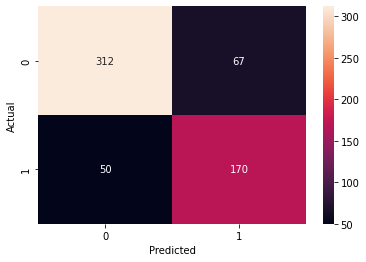

In [19]:
#Let's look at model's predictions distribution
confusion_matrix = pd.crosstab(val['labels'], val['predictions'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True, fmt='d')
plt.show()

In [20]:
val = val.drop(columns=['labels', 'Stance']).rename(columns={'predictions':
                                                      'Premise'})
val

,id,text,Claim,Premise
0,7212131785749,Ordered a mask that had a cute chain attached ...,face masks,0
1,2367433035,Who is ready for some #baseball? #BaseballisB...,stay at home orders,0
2,496011,"@Mystere07623203 @va_shiva @Liberty13046 130,0...",face masks,1
3,1490686,When they ask me what I did with my life I wil...,face masks,0
4,1209366,Taylor not putting her album in physical store...,stay at home orders,0
...,...,...,...,...
595,2949472,@BrianKempGA is one of the few #Governors that...,face masks,0
596,208269,I tested positive for Covid. Got it from a fri...,face masks,1
597,2316008,"If you are under retirement age, you have a *m...",stay at home orders,1
598,659269,@TheLalasventure @doqholliday @realDonaldTrump...,face masks,0


In [21]:
# accuracy, precision, recall, f1-score, log loss

def get_metrics(y_true, y_pred):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    logloss = log_loss(y_true, y_pred)
    return accuracy, precision, recall, f1, logloss

In [22]:
accuracy, precision, recall, f1, logloss = get_metrics(y_true, y_pred)

In [23]:
print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1: ', f1)
print('Log loss: ', logloss)

Accuracy:  0.8046744574290484
Precision:  0.8087776976204561
Recall:  0.8046744574290484
F1:  0.8060668506399683
Log loss:  6.7463946765148135
